# Bring in dependencies

In [32]:
import tensorflow as tf
import numpy as np
import sklearn
import pandas as pd

# Config

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.set_printoptions(linewidth=5000)

# Bring in datasets

In [7]:
( X_train_raw, y_train_raw ), ( X_test_raw, y_test_raw ) = tf.keras.datasets.mnist.load_data()

# Shuffle datasets

In [12]:
X_train_shuffled, y_train_shuffled = sklearn.utils.shuffle(X_train_raw, y_train_raw, random_state=777)

X_test_shuffled, y_test_shuffled = sklearn.utils.shuffle(X_test_raw, y_test_raw, random_state=777)

# Normalize (X) example inputs

In [13]:
X_train_normalized = X_train_shuffled / 255.0

X_test_normalized = X_test_shuffled / 255.0

# One-hot encode (y) label outputs

In [14]:
y_train_one_hot_encoded = tf.keras.utils.to_categorical(y_train_shuffled)

y_test_one_hot_encoded = tf.keras.utils.to_categorical(y_test_shuffled)

# Sanity check modifications

In [17]:
sample_index=1

X_train_shuffled[sample_index], X_train_normalized[sample_index], y_train_shuffled[sample_index], y_train_one_hot_encoded[sample_index]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  59, 217, 162,  12,  24,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 244, 254, 250, 226, 254, 250, 200, 106,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 216, 254, 254, 175,  47,  31,  

In [20]:
sample_index=3

X_test_shuffled[sample_index], X_test_normalized[sample_index], y_test_shuffled[sample_index], y_test_one_hot_encoded[sample_index]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 234, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 136, 252,  

# Accept modified datasets, reshaping as needed

In [23]:
X_train = tf.expand_dims(X_train_normalized, axis=-1)
y_train = y_train_one_hot_encoded

X_test = tf.expand_dims(X_test_normalized, axis=-1)
y_test = y_test_one_hot_encoded

# Create model architecture

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (60000, 28, 28, 50)       500       
                                                                 
 max_pooling2d_8 (MaxPooling  (60000, 14, 14, 50)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (60000, 14, 14, 50)       22550     
                                                                 
 max_pooling2d_9 (MaxPooling  (60000, 7, 7, 50)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (60000, 7, 7, 50)         22550     
                                                                 
 max_pooling2d_10 (MaxPoolin  (60000, 3, 3, 50)       

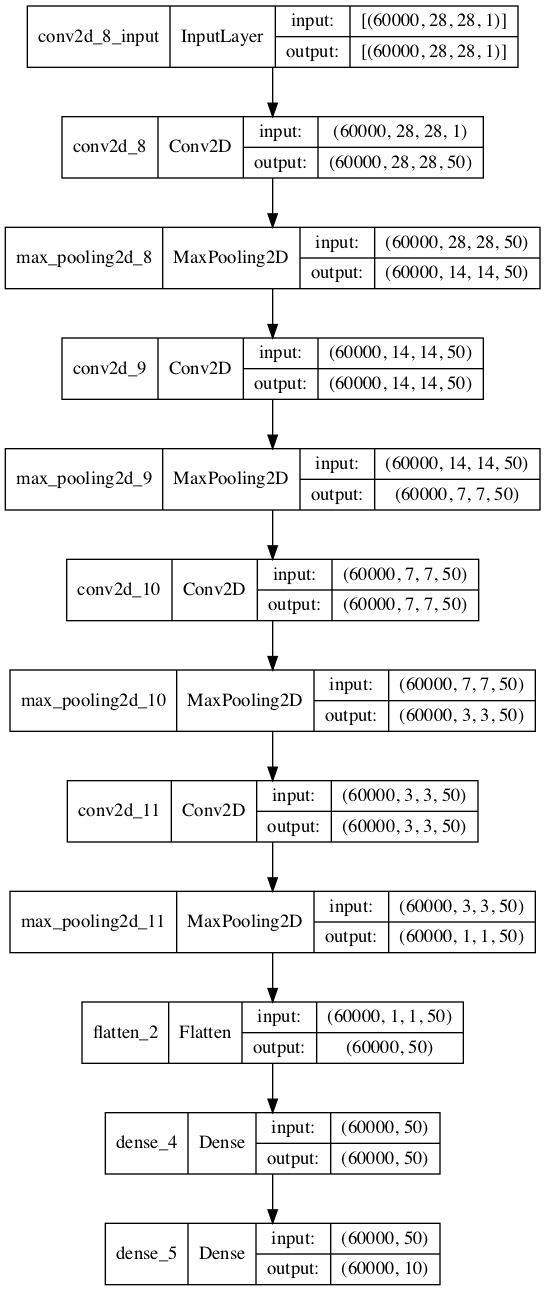

In [26]:
tf.random.set_seed(777)

model_001 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    
    tf.keras.layers.Dense(len(y_train[0]), activation=tf.keras.activations.softmax)
    
])

model_001.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[ "accuracy" ]
)

model_001.build(X_train.shape)

model_001.summary()

tf.keras.utils.plot_model(model_001, show_shapes=True)

# Train model

In [29]:
def learning_rate_schedule(current_epoch, current_learning_rate):
    return current_learning_rate

model_001_history = model_001.fit(
    X_train,
    y_train,
    epochs=25,
    validation_data=(X_test, y_test),
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(schedule=learning_rate_schedule),
        tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
    ]
)

Epoch 1/25
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1747 - accuracy: 0.9456 - val_loss: 0.0509 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 2/25
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0529 - accuracy: 0.9838 - val_loss: 0.0435 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 3/25
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0273 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 4/25
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0295 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 5/25
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0320 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 6/25
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0262 - val_accuracy: 0.9919 - lr: 0.0010
Epoch 7/25
1875/1875 [========================

# Observe training history

In [33]:
pd.DataFrame(model_001_history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.174736,0.945567,0.050932,0.9845,0.001
1,0.052886,0.983833,0.043490,0.9850,0.001
2,0.038308,0.987917,0.027273,0.9907,0.001
3,0.029925,0.990317,0.029468,0.9894,0.001
4,0.023731,0.992517,0.031998,0.9903,0.001
5,0.020667,0.993217,0.026188,0.9919,0.001
6,0.016841,0.994600,0.025096,0.9918,0.001
7,0.014890,0.995000,0.026690,0.9915,0.001
8,0.012944,0.995700,0.035552,0.9899,0.001
9,0.011357,0.996450,0.027604,0.9914,0.001


<AxesSubplot:>

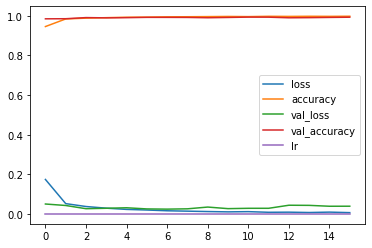

In [34]:
pd.DataFrame(model_001_history.history).plot()

<AxesSubplot:>

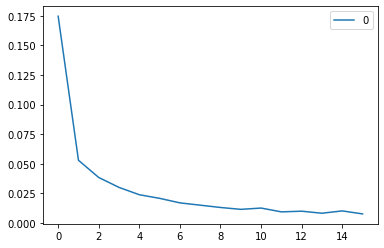

In [36]:
pd.DataFrame(model_001_history.history["loss"]).plot()

<AxesSubplot:>

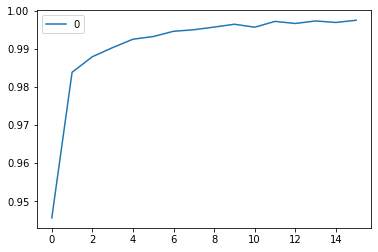

In [37]:
pd.DataFrame(model_001_history.history["accuracy"]).plot()

<AxesSubplot:>

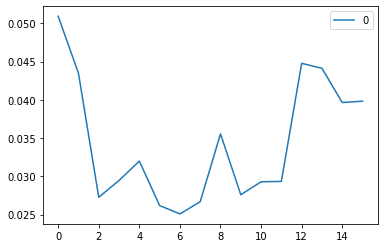

In [38]:
pd.DataFrame(model_001_history.history["val_loss"]).plot()

<AxesSubplot:>

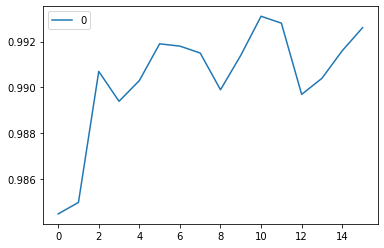

In [39]:
pd.DataFrame(model_001_history.history["val_accuracy"]).plot()

# Evaluate results
- The model weights from the 11th epoch were selected

In [31]:
model_001.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0293 - accuracy: 0.9931


[0.02929639257490635, 0.9930999875068665]